<a href="https://colab.research.google.com/github/wrn6494/Python-Case-Studies/blob/main/Bike_Share_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: How Does a Bike-Share Navigate Speedy Success?**

A Google Coursera Course Capstone Case Study

# Deliverable

**Business Problem**

The director of marketing believes the company’s future success depends on ***maximizing the number of annual memberships***. Therefore,
the analytics team wants to **understand how casual riders and annual members use Cyclistic bikes differently**. From these insights,
the team will design a **new marketing strategy** to convert casual riders into annual members. 


**Main Objective of this Case Study**

Determine how annual members and casual riders use Cyclistic bikes
differently.

# Key Stakeholders

* **Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels. 

* **Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. 

* **Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program. 

# Description of Data

The data came from Divvy bicycle sharing service run by Lyft Bikes and Scooters, LLC (“Bikeshare”). The data has been made available by Motivate International Inc under this [license](https://ride.divvybikes.com/data-license-agreement). The data is made publicly available [here](https://divvy-tripdata.s3.amazonaws.com/index.html). For this case study we will be using the data from September 2021 to August 2022. It is stored in 12 csv files.

**About the Company**

Divvy is Chicagoland’s bike share system across Chicago and Evanston. Divvy provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago.
Divvy, like other bike share systems, consists of a fleet of specially-designed, sturdy and durable bikes that are locked into a network of docking stations throughout the region. The bikes can be unlocked from one station and returned to any other station in the system. People use bike share to explore Chicago, commute to work or school, run errands, get to appointments or social engagements, and more.
Divvy is available for use 24 hours/day, 7 days/week, 365 days/year, and riders have access to all bikes and stations across the system. More info can be read [here](https://ride.divvybikes.com/about).

**About the Data**

Each trip is anonymized and includes:
   * Trip start day and time
   * Trip end day and times
   * Trip start station
   * Trip end station
   * Rider type (Member, Single Ride, and Day Pass)
   * Ride Type
      
The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

Single Ride: 1 USD / unlock, 0.16 USD for each additional minute

Day Pass: 15 USD / day, unlimited number of 3 hour rides over a 24-hour period. If  a bike is out for longer than 3 hours at a time, the customer will be charged an extra 0.16 USD for each additional minute.
 
Annual Membership: 10 USD/month, the first 45 minutes of each ride are included in the membership price. If a bike is out for longer than 45 minutes at a time, the customer will be charged an extra 0.16 USD for each additional minute.
All per minute ride prices are rounded up to the nearest minute.
 
NOTE: If  a bike is not return within a 24-hour period, the customer may be charged a lost or stolen bike fee of $1200.

 https://ride.divvybikes.com/system-data
https://help.divvybikes.com/hc/en-us/articles/360033484791-What-if-I-keep-a-bike-out-too-long-

# Data Preparation

#### Combine multiple csvs into 1 dataframe

In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import time
from matplotlib import rcParams, cycler
%matplotlib inline

In [ ]:
directory_path = '/content/drive/My Drive/Bike Share Case Study Datasets'
directory_files = os.listdir(directory_path)

In [ ]:
df = pd.DataFrame()
#append all files together
for file in directory_files:
            df_temp = pd.read_csv(os.path.join(directory_path, file))
            df = df.append(df_temp, ignore_index=True)

#### Check basic details about dataframe

In [ ]:
#check number of records, columns, and  datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883043 entries, 0 to 5883042
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 583.5+ MB


In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,NaN,NaN,NaN,NaN,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,NaN,NaN,NaN,NaN,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,NaN,NaN,NaN,NaN,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,NaN,NaN,NaN,NaN,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,NaN,NaN,NaN,NaN,41.88,-87.74,41.88,-87.71,casual


Started at and end at columns should be datetime data type.

In [ ]:
#check null values
df.isnull().sum().sort_values(ascending=False)

end_station_name      946303
end_station_id        946303
start_station_name    884365
start_station_id      884363
end_lat                 5727
end_lng                 5727
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_lat                  0
start_lng                  0
member_casual              0
dtype: int64

In [ ]:
#percentage of missing values by column

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

end_station_name      16.09
end_station_id        16.09
start_station_name    15.03
start_station_id      15.03
end_lat                0.10
end_lng                0.10
ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_lat              0.00
start_lng              0.00
member_casual          0.00
dtype: float64

There are at most 16% of null data. Although we have the gps data I decided not to use it. (The docks are close to each other, gps tracking vary on weather conditions, the location is located in urban area which also reduces the gps accuracy). We will look further into the start and end stations to fill in the missing values. 

#### Data cleaning

In [ ]:
#convert data types
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])
df['member_casual']=(df['member_casual']).astype(str)

In [ ]:
#check how many of the bikes are returned to its start station.
a=np.empty(len(df))
b=0
for i in range(len(df)):
  if (pd.isnull(df['start_station_name'][i])==True) and (pd.isnull(df['end_station_name'][i])==True):
    b=b+1
  else:
    a[i]=df['start_station_name'][i]==df['end_station_name'][i]

In [ ]:
#check the percentage of bikes returned to start station and with both null at end and start stations
returned_tostart=round((a.sum() * 100) / len(a), 2)
both_null=round((b* 100) / len(a), 2)
print ('% of bikes returned to its start station:', returned_tostart,  '\n% of rides with both no start and end station:',both_null)

% of bikes returned to its start station: 5.17 
% of rides with both no start and end station: 8.63


* There are 5.17% of the total number of bikes returned to its start station. 

* There are 8.63% of the total number of ride with both no start and end station. I will drop these records.

In [ ]:
#drop records with missing both start and end station. create a list of index to drop.
c=[]
for i in range(len(df)):
  if (pd.isnull(df['start_station_name'][i])==True) and (pd.isnull(df['end_station_name'][i])==True):
    c.append(i)

In [ ]:
#drop records with the index list
df.drop(df.index[c], inplace=True)

Since I don't have much data about the stations, I will just assume that the null values are borrowed and returned to their corresponding start/end station.

In [ ]:
#replace null values with their corresponding start station and end station.
df['start_station_name'] = df['start_station_name'].fillna(df['end_station_name'])
df['end_station_name'] = df['end_station_name'].fillna(df['start_station_name'])

In [ ]:
#check again if there are null values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name         0
start_station_id      376593
end_station_name           0
end_station_id        438532
start_lat                  0
start_lng                  0
end_lat                 5727
end_lng                 5727
member_casual              0
dtype: int64

I will drop columns that I won't be using fro the anlysis:

*  start_station_id 
*  end_station_id 
*  start_lat 
*  start_lng 
*  end_lat 
*  end_lng 

In [ ]:
#drop columns.
df=df.drop(['start_station_id','end_station_id','start_lat','start_lng','end_lat','end_lng'], axis=1)

#### Looking closely at values

In [ ]:
#check if there are ride_id duplicates to see if ride id are unique to every rides or every rider
df[df['ride_id'].duplicated()=='True'].sum()

<ipython-input-20-847521acecdf>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['ride_id'].duplicated()=='True'].sum()


ride_id               0.0
rideable_type         0.0
start_station_name    0.0
end_station_name      0.0
member_casual         0.0
dtype: float64

There are no duplicates in ride_id. It only corresponds to the ride itself. It is not related to the specific rider, we cannot use it to know the number of distinct members who uses the bike program. We cannot further look into each member's characteristics.

In [ ]:
# Categorical columns

cat_columns = ['rideable_type', 'start_station_name', 'end_station_name', 'member_casual']


# Unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = df[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


rideable_type: 
['electric_bike' 'classic_bike' 'docked_bike']

----------------------------------------------------------------------

start_station_name: 
['Clark St & Grace St' 'Wells St & Walton St' 'Larrabee St & Armitage Ave'
 ... 'Public Rack - Kedzie Ave &amp; 62nd Pl' 'East End Ave & 75th St'
 'Eggleston Ave & 115th St']

----------------------------------------------------------------------

end_station_name: 
['Clark St & Grace St' 'Desplaines St & Kinzie St' 'Clark St & Leland Ave'
 ... 'Public Rack - Kedzie Ave & Chicago Ave' 'Eggleston Ave & 115th St'
 'Public Rack - Kedzie Ave &amp; 62nd Pl']

----------------------------------------------------------------------

member_casual: 
['casual' 'member']

----------------------------------------------------------------------


The rideable type - "docked_bike' is questionable. I'll look into it further.

In [ ]:
#check records with thy rideable type
df[df['rideable_type']=='docked_bike']

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
1218,E25F9BB77BF79AAA,docked_bike,2021-09-08 21:19:52,2021-09-08 22:04:33,Michigan Ave & Oak St,Michigan Ave & Oak St,casual
2222,ADCEFA40C19C4A98,docked_bike,2021-09-17 09:59:14,2021-09-17 10:29:53,Clark St & Leland Ave,Clark St & Grace St,casual
2338,F632F73A277FA645,docked_bike,2021-09-18 13:03:24,2021-09-18 13:25:51,Michigan Ave & Oak St,Michigan Ave & Oak St,casual
2532,61BEDFE97FDC3CD0,docked_bike,2021-09-26 09:55:28,2021-09-26 11:49:11,Michigan Ave & Oak St,Michigan Ave & Oak St,casual
2594,A879D2EDE2039A12,docked_bike,2021-09-03 23:23:19,2021-09-04 00:41:59,Michigan Ave & Oak St,Michigan Ave & Oak St,casual
...,...,...,...,...,...,...,...
5882319,6F8B0AF48A197F2A,docked_bike,2022-08-06 17:51:53,2022-08-08 05:00:12,Ashland Ave & Wellington Ave,Ashland Ave & Wellington Ave,casual
5882364,FF5608845AB7570F,docked_bike,2022-08-05 15:34:23,2022-08-05 16:25:10,Fairbanks Ct & Grand Ave,California Ave & Milwaukee Ave,casual
5882528,25D0B21480E38D38,docked_bike,2022-08-22 22:04:10,2022-09-01 20:38:02,Clark St & Lincoln Ave,Clark St & Lincoln Ave,casual
5882680,4396CB18C209D3A4,docked_bike,2022-08-10 01:42:25,2022-08-10 01:52:15,California Ave & Cortez St,California Ave & Milwaukee Ave,casual


According to their website there are only 2 types of bike, ebike and classic bike. For the purpose of this analysis and due to lack of info about the rideable type: docked bikes, I will assume that they are bikes that are docked(not used) and therefore drop the records with this rideable_type.

In [ ]:
#drop records with rideable_type,docked bikes
df.drop(df[df['rideable_type']=='docked_bike'].index, inplace=True)

# Data Preparation: Adding new columns

#### Length Ride

In [ ]:
#add new column length ride to compute duration of bike use
length_ride=df['ended_at']-df['started_at']
df['length_ride']=length_ride
df['length_ride']

10        0 days 00:07:54
59        0 days 00:10:38
61        0 days 00:32:27
63        0 days 00:19:15
69        0 days 00:20:10
                ...      
5883037   0 days 00:04:01
5883038   0 days 00:14:00
5883039   0 days 00:06:13
5883040   0 days 00:07:19
5883041   0 days 00:08:34
Name: length_ride, Length: 4726785, dtype: timedelta64[ns]

In [ ]:
df['length_ride'].describe()

count                      4726785
mean     0 days 00:12:25.573830838
std      0 days 00:08:39.093632716
min                0 days 00:01:00
25%                0 days 00:06:02
50%                0 days 00:10:04
75%                0 days 00:16:33
max                0 days 00:48:59
Name: length_ride, dtype: object

A negative value for length ride is not possible. Check data further.

In [ ]:
#look at records with negative length ride.
df[df['length_ride']< '0 days 00:00:00']

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,length_ride,hour,day,month,dayofweek,period,price,season


It seems like started at and ended at are switched.

In [ ]:
#swap values from each column
pd.options.mode.chained_assignment = None
df_swap = df[df['length_ride']<'0 days 00:00:00']
df.drop(df[df['length_ride']<'0 days 00:00:00'].index,inplace=True)

def swap_columns(df,c1,c2):
    df_swap['temp'] = df_swap[c1].copy(deep=False)
    df_swap[c1] = df_swap[c2].copy(deep=False)
    df_swap[c2] = df_swap['temp'].copy(deep=False)
    df_swap.drop(columns=['temp'], inplace=True)

swap_columns(df_swap,'started_at','ended_at')
df.append(df_swap, ignore_index=True)


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,length_ride,hour,day,month,dayofweek,period,price,season
0,CBFE6F6DE98B37BC,electric_bike,2021-09-28 21:54:55,2021-09-28 22:02:49,Clark St & Grace St,Clark St & Grace St,casual,0 days 00:07:54,21,28,September,Tuesday,Evening,2.12,Fall
1,E92C804563F261EC,classic_bike,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,Desplaines St & Kinzie St,casual,0 days 00:10:38,1,5,September,Sunday,Early Morning,2.60,Fall
2,9ECA91210441E847,classic_bike,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,Clark St & Leland Ave,casual,0 days 00:32:27,13,5,September,Sunday,Afternoon,6.12,Fall
3,306193784EF03E2D,electric_bike,2021-09-05 10:37:04,2021-09-05 10:56:19,Michigan Ave & Oak St,Michigan Ave & Oak St,casual,0 days 00:19:15,10,5,September,Sunday,Morning,4.04,Fall
4,7CEA96C0EAF85111,electric_bike,2021-09-30 11:42:33,2021-09-30 12:02:43,Michigan Ave & Oak St,Michigan Ave & Oak St,casual,0 days 00:20:10,11,30,September,Thursday,Morning,4.20,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726780,3A50755D869397FB,electric_bike,2022-08-09 06:41:21,2022-08-09 06:45:22,Ashland Ave & Wellington Ave,Ashland Ave & Wellington Ave,member,0 days 00:04:01,6,9,August,Tuesday,Early Morning,10.00,Summer
4726781,EC17BE8AB1D73C88,electric_bike,2022-08-12 08:28:26,2022-08-12 08:42:26,Paulina St & Montrose Ave,Paulina St & Montrose Ave,member,0 days 00:14:00,8,12,August,Friday,Morning,10.00,Summer
4726782,57BAC0EA3A067A83,electric_bike,2022-08-22 12:30:19,2022-08-22 12:36:32,California Ave & 21st St,California Ave & 21st St,member,0 days 00:06:13,12,22,August,Monday,Morning,10.00,Summer
4726783,9B97FAE30276C299,electric_bike,2022-08-09 07:43:31,2022-08-09 07:50:50,Clinton St & Washington Blvd,Clinton St & Washington Blvd,member,0 days 00:07:19,7,9,August,Tuesday,Morning,10.00,Summer


In [ ]:
#check values again
df['length_ride'].describe()

count                      4726785
mean     0 days 00:12:25.573830838
std      0 days 00:08:39.093632716
min                0 days 00:01:00
25%                0 days 00:06:02
50%                0 days 00:10:04
75%                0 days 00:16:33
max                0 days 00:48:59
Name: length_ride, dtype: object

In [ ]:
df[df['length_ride']<'0 days 00:01:00']

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,length_ride,hour,day,month,dayofweek,period,price,season


I will remove records with less than 1 minute length ride as they can be considered re-dock according to the website.

> Any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure)



In [ ]:
#drop length ride less than 1 minute
df.drop(df[df['length_ride']<'0 days 00:01:00'].index,inplace=True)

According to the website bikes not returned for more than 24 hrs is stolen. I will further check these records.

In [ ]:
#check records with length rides equal and more than 1 day.
df[df['length_ride']>='1 days 00:00:00'].groupby('member_casual').count()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,length_ride,hour,day,month,dayofweek,period,price,season
member_casual,,,,,,,,,,,,,,


Since the count is minimal, I decided to drop these data.

In [ ]:
#drop length rides equal and more than 1 day.
df.drop(df[df['length_ride']>='1 days 00:00:00'].index,inplace=True)

In [ ]:
#convert values to minutes for easier manipulation later.
df['length_ride']=df['length_ride'].astype('timedelta64[m]')

In [ ]:
df['length_ride'].describe()

count    4.726785e+06
mean     1.193495e+01
std      8.654369e+00
min      1.000000e+00
25%      6.000000e+00
50%      1.000000e+01
75%      1.600000e+01
max      4.800000e+01
Name: length_ride, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


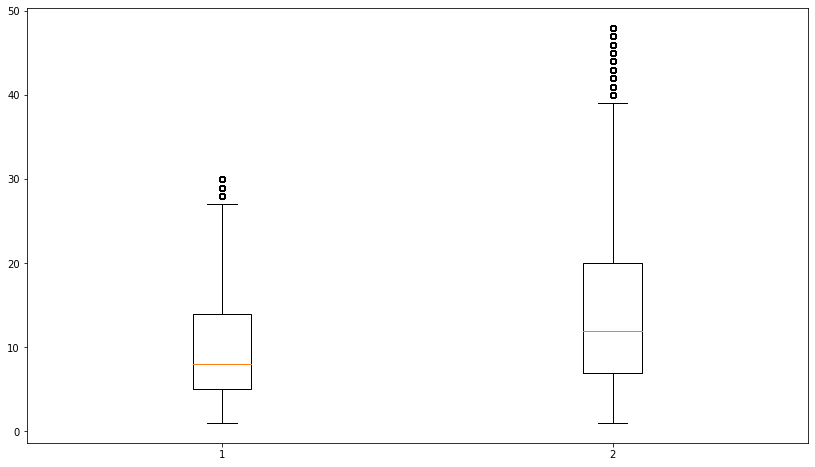

In [ ]:
#illustrate distribution using box plot
member =df[df['member_casual']=='member']
casual = df[df['member_casual']=='casual']
columns_ride = [member['length_ride'],casual['length_ride']]

plt.figure(figsize = (14, 8))
plt.boxplot(columns_ride)
plt.show()

It looks lot there are a lot of outliers.

In [ ]:
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    return lwr_bound,upr_bound

bounds_member = detect_outliers_iqr(member['length_ride'])
bounds_casual = detect_outliers_iqr(casual['length_ride'])
print(bounds_member, bounds_casual)

(-8.5, 27.5) (-12.5, 39.5)


In [ ]:
#percentage of outliers for members
sum(np.array(member['length_ride'])>30)/len(member['length_ride'])*100

0.0

In [ ]:
#percentage of outliers for casual
sum(np.array(casual['length_ride'])>48)/len(member['length_ride'])*100

0.0

For the purpose of this study I will be dropping the records with the outliers.

In [ ]:
df.drop(df[(df['member_casual'] =='member') & (df['length_ride'] > 30)].index, inplace=True)

In [ ]:
df.drop(df[(df['member_casual'] =='casual') & (df['length_ride'] > 48)].index, inplace=True)

In [ ]:
member =df[df['member_casual']=='member']
casual = df[df['member_casual']=='casual']

#### Month

In [ ]:
df['hour'] = df['started_at'].dt.hour

In [ ]:
df['day'] = df['started_at'].dt.day

In [ ]:
df['month'] = df['started_at'].dt.month_name()

In [ ]:
df['dayofweek'] = df['started_at'].dt.day_name()

#### Time Period

In [ ]:
bins = [0,6,12,18,24]
bin_labels = ['Early Morning','Morning','Afternoon','Evening']
df['period']= pd.cut(df['hour'], bins=bins, labels=bin_labels)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,length_ride,hour,day,month,dayofweek,period,price,season
10,CBFE6F6DE98B37BC,electric_bike,2021-09-28 21:54:55,2021-09-28 22:02:49,Clark St & Grace St,Clark St & Grace St,casual,7.0,21,28,September,Tuesday,Evening,2.12,Fall
59,E92C804563F261EC,classic_bike,2021-09-05 01:25:08,2021-09-05 01:35:46,Wells St & Walton St,Desplaines St & Kinzie St,casual,10.0,1,5,September,Sunday,Early Morning,2.60,Fall
61,9ECA91210441E847,classic_bike,2021-09-05 13:33:41,2021-09-05 14:06:08,Larrabee St & Armitage Ave,Clark St & Leland Ave,casual,32.0,13,5,September,Sunday,Afternoon,6.12,Fall
63,306193784EF03E2D,electric_bike,2021-09-05 10:37:04,2021-09-05 10:56:19,Michigan Ave & Oak St,Michigan Ave & Oak St,casual,19.0,10,5,September,Sunday,Morning,4.04,Fall
69,7CEA96C0EAF85111,electric_bike,2021-09-30 11:42:33,2021-09-30 12:02:43,Michigan Ave & Oak St,Michigan Ave & Oak St,casual,20.0,11,30,September,Thursday,Morning,4.20,Fall


#### Ride Price

In [ ]:
def price_member(x):
    if x>45:
       a= 10 + (x-45)*0.16
       return a
    else:
       return 10

In [ ]:
df['price'] = 1+(df[df['member_casual']=='casual']['length_ride']*0.16)

In [ ]:
df['price']=df['price'].fillna(df['length_ride'].map(lambda x : price_member(x)))

### Seasons

In [ ]:
seasons = {'March':'Spring', 'April':'Spring','May':'Spring',
           'June':'Summer', 'July':'Summer','August':'Summer',
           'September':'Fall','October':'Fall','November':'Fall',
           'December':'Winter','January':'Winter','February':'Winter'}

df['season']= df['month'].map(seasons)

# Exploratory Data Analysis

**Questions**

*  How many bikes are rented by casual and member?
*  What type of bikes are casual and members use?
*  What station do they start and end for both casual and member?
*  What time of the day is the busiest? Day of the week?
*  What month/season are peak and low?
*  How long do they ride?
*  How much do they spend?

In [ ]:
df['member_casual'].value_counts()

member    2886051
casual    1840734
Name: member_casual, dtype: int64

### Type of Bike

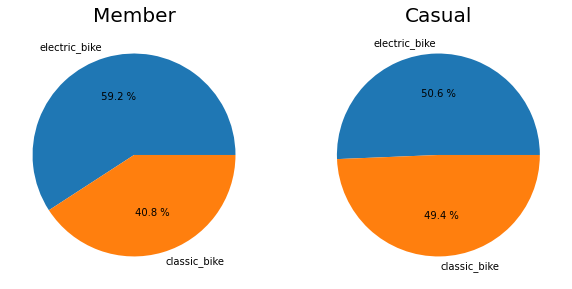

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].pie(df[df['member_casual']=='member']['rideable_type'].value_counts(),autopct ='% 1.1f %%',labels=df['rideable_type'].unique())
ax[0].set_title('Member', size=(20))
ax[1].pie(df[df['member_casual']=='casual']['rideable_type'].value_counts(),autopct ='% 1.1f %%',labels=df['rideable_type'].unique())
ax[1].set_title('Casual', size=(20))
plt.show() 

### Station

In [ ]:
df_station1 = df.groupby(['start_station_name','member_casual'])['member_casual'].count().sort_values(ascending=False)
df_station1=df_station1.to_frame()
df_station1.rename(columns={'member_casual':'count'}, inplace=True)
df_station1.reset_index(inplace=True)
df_station1

,start_station_name,member_casual,count
0,Streeter Dr & Grand Ave,casual,39910
1,Kingsbury St & Kinzie St,member,26696
2,Clark St & Elm St,member,23502
3,Wells St & Concord Ln,member,23435
4,Ellis Ave & 60th St,member,21564
...,...,...,...
2700,Public Rack - Francisco Ave & Touhy Ave,member,1
2701,Public Rack - Grand Ave & Lawndale Ave,casual,1
2702,Keef Ave & South Chicago Ave,casual,1
2703,Western Ave & 111th St - SW,member,1


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


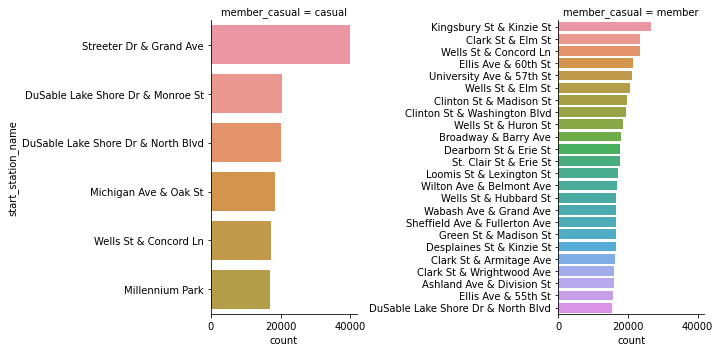

In [ ]:
sns.catplot(x='count',
            y='start_station_name',
            data=df_station1.head(30),
            col="member_casual", kind="bar",sharey=False)

In [ ]:
df_station2 = df.groupby(['end_station_name','member_casual'])['member_casual'].count().sort_values(ascending=False)
df_station2=df_station2.to_frame()
df_station2.rename(columns={'member_casual':'count'}, inplace=True)
df_station2.reset_index(inplace=True)
df_station2

,end_station_name,member_casual,count
0,Streeter Dr & Grand Ave,casual,39920
1,Kingsbury St & Kinzie St,member,26440
2,Wells St & Concord Ln,member,23975
3,Clark St & Elm St,member,23763
4,DuSable Lake Shore Dr & North Blvd,casual,22865
...,...,...,...
2716,Public Rack - Eli Whitney Public School,member,1
2717,Public Rack - Division St & Christiana Ave,casual,1
2718,Public Rack - California Ave & Touhy Ave - mid...,member,1
2719,Public Rack - California Ave & Touhy Ave - mid...,casual,1


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


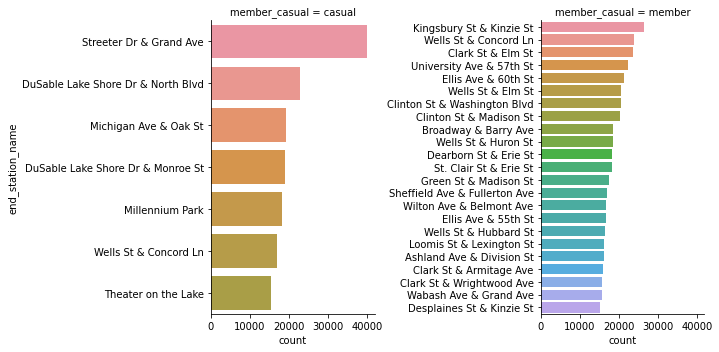

In [ ]:
sns.catplot(x='count',
            y='end_station_name',
            data=df_station2.head(30),
            col="member_casual", kind="bar",sharey=False)

### Hourly

In [ ]:
hourly=df.groupby(['member_casual','hour'])['ride_id'].count().reset_index()

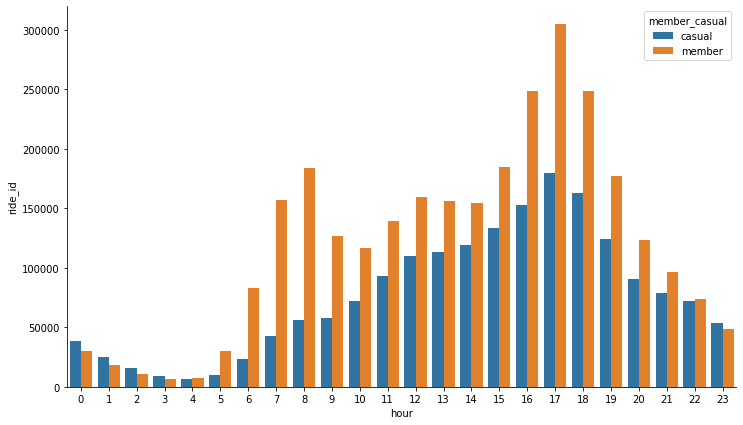

In [ ]:
rcParams['figure.figsize'] = 12,7
figure=sns.barplot(data=hourly,x='hour',y='ride_id',hue='member_casual')
sns.despine(top=True,right=True)

### Daily

In [ ]:
daily=df.groupby(['member_casual','dayofweek'])['ride_id'].count().reset_index()

In [ ]:
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [ ]:
daily['dayofweek']=pd.Categorical(daily['dayofweek'], categories=ordered_days, ordered=True)

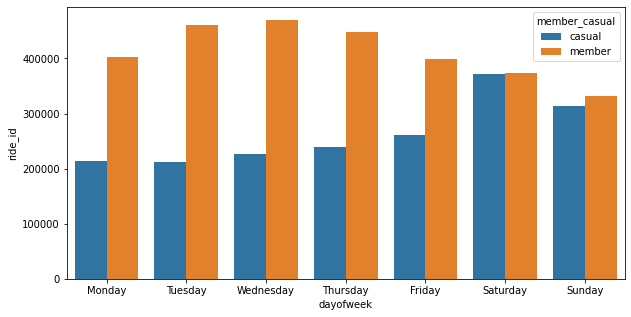

In [ ]:
sns.barplot(data=daily,x='dayofweek',y='ride_id',hue='member_casual')

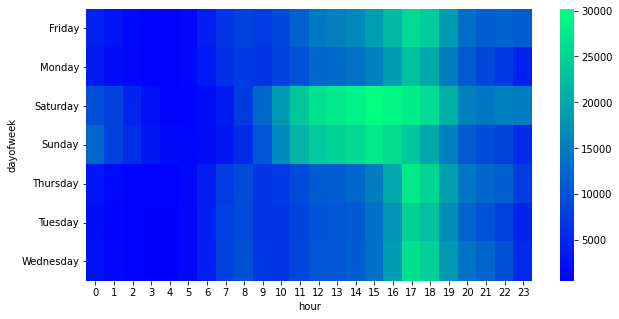

In [ ]:
casual_hm=df.query("member_casual=='casual'")
casual_hm=casual_hm.groupby(['dayofweek','hour'])['ride_id'].count().unstack()
sns.heatmap(casual_hm,cmap='winter')

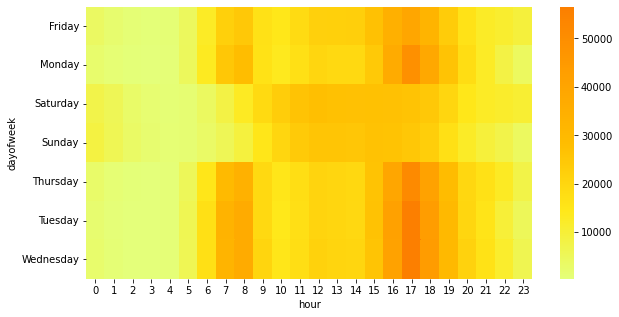

In [ ]:
member_hm=df.query("member_casual=='member'")
member_hm=member_hm.groupby(['dayofweek','hour'])['ride_id'].count().unstack()
sns.heatmap(member_hm,cmap='Wistia')

### Per Season

In [ ]:
ordered_seasons = ["Spring", "Summer", "Fall", "Winter"]

In [ ]:
seasonal=df.groupby(['member_casual','season'])['ride_id'].count().reset_index()

In [ ]:
seasonal['season']=pd.Categorical(seasonal["season"], categories=ordered_seasons, ordered=True)

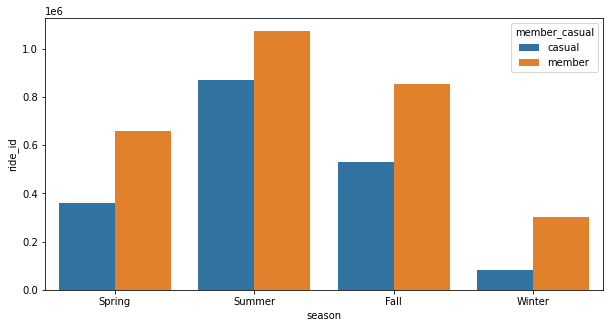

In [ ]:
sns.barplot(data=seasonal,x='season',y='ride_id',hue='member_casual')

### Month per Month

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [ ]:
monthly=df.groupby(['member_casual','month'])['ride_id'].count().reset_index()

In [ ]:
monthly['month']=pd.Categorical(monthly["month"], categories=ordered_months, ordered=True)

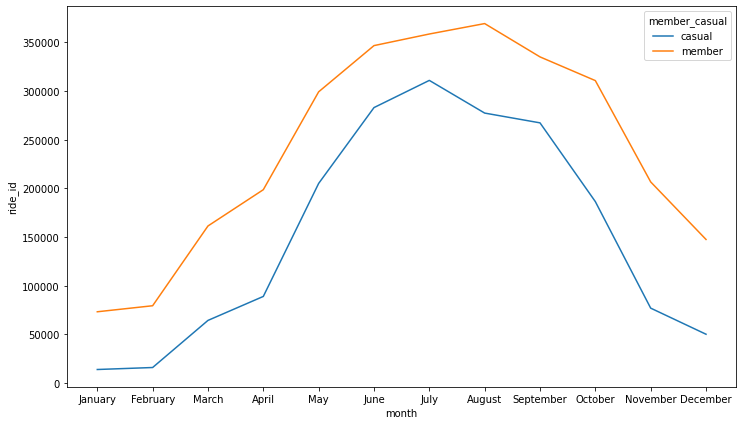

In [ ]:
sns.lineplot(data=monthly,x='month',y='ride_id',hue='member_casual')

### Length Ride

In [ ]:
hour_ride= df.groupby(['member_casual','hour'])['length_ride'].agg(['median','count'])
hour_ride.reset_index(inplace=True)
hour_ride.head()

,member_casual,hour,median,count
0,casual,0,11.0,38068
1,casual,1,11.0,24872
2,casual,2,11.0,15608
3,casual,3,10.0,8991
4,casual,4,10.0,6306


In [ ]:
week_ride= df.groupby(['member_casual','dayofweek'])['length_ride'].agg(['median','count'])
week_ride.reset_index(inplace=True)
week_ride['dayofweek']=pd.Categorical(week_ride['dayofweek'], categories=ordered_days, ordered=True)
week_ride.head()

,member_casual,dayofweek,median,count
0,casual,Friday,12.0,261482
1,casual,Monday,12.0,214372
2,casual,Saturday,14.0,371688
3,casual,Sunday,14.0,313773
4,casual,Thursday,11.0,240012


In [ ]:
month_ride= df.groupby(['member_casual','month'])['length_ride'].agg(['median','count'])
month_ride.reset_index(inplace=True)
month_ride['month']=pd.Categorical(month_ride["month"], categories=ordered_months, ordered=True)
month_ride.head()

,member_casual,month,median,count
0,casual,April,12.0,89056
1,casual,August,11.0,277307
2,casual,December,10.0,50239
3,casual,February,10.0,16076
4,casual,January,9.0,14033


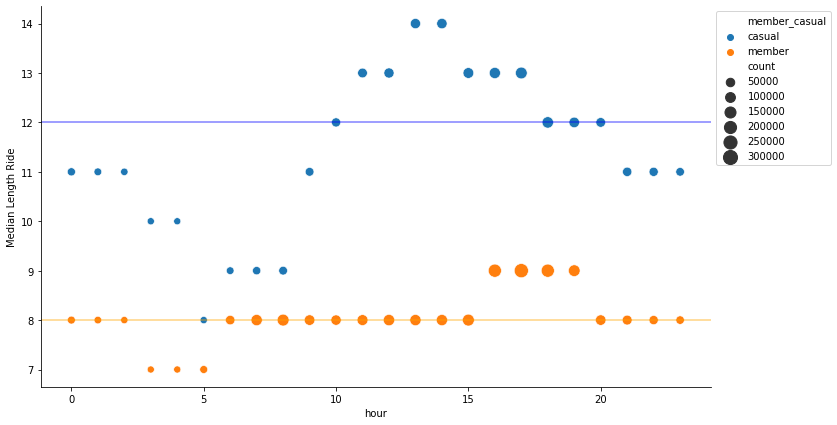

In [ ]:
fig, ax = plt.subplots()
ax=sns.scatterplot(data=hour_ride,x='hour',y='median',hue='member_casual',size='count',sizes=(50, 200))
plt.ylabel('Median Length Ride')
plt.axhline(y=member['length_ride'].median(),color='orange',alpha=0.5)
plt.axhline(y=casual['length_ride'].median(),color='blue',alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(top=True, right=True)

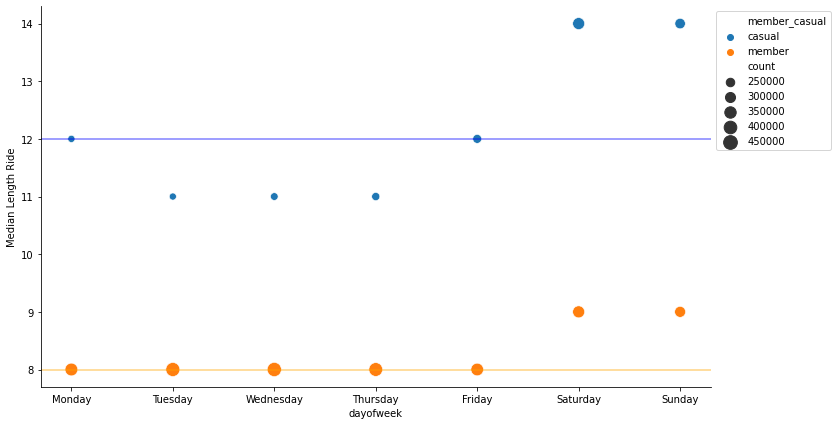

In [ ]:
ax = sns.scatterplot(data=week_ride,x='dayofweek',y='median',hue='member_casual',size='count',sizes=(50, 200))
plt.ylabel('Median Length Ride')
plt.legend(markerscale=2)
plt.axhline(y=member['length_ride'].median(),color='orange',alpha=0.5)
plt.axhline(y=casual['length_ride'].median(),color='blue',alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(top=True, right=True)

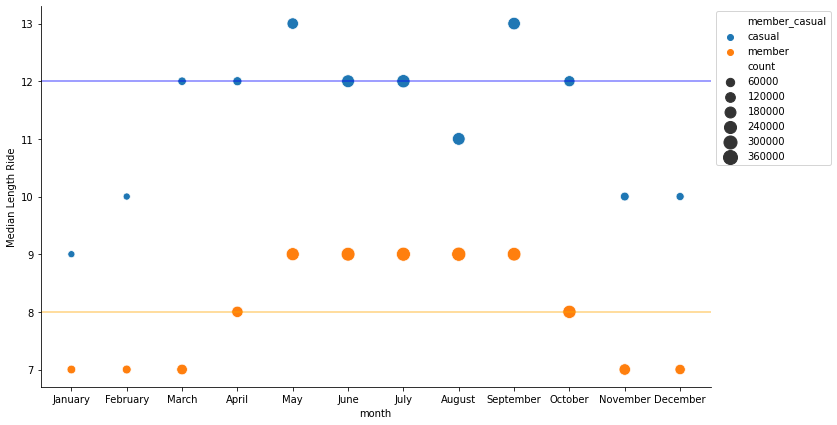

In [ ]:
ax = sns.scatterplot(data=month_ride,x='month',y='median',hue='member_casual',size='count',sizes=(50, 200))
plt.ylabel('Median Length Ride')
plt.axhline(y=member['length_ride'].median(),color='orange',alpha=0.5)
plt.axhline(y=casual['length_ride'].median(),color='blue',alpha=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
sns.despine(top=True, right=True)

### Ride Price

In [ ]:
df.query("member_casual=='casual'")['price'].describe()

count    1.840734e+06
mean     3.385892e+00
std      1.652197e+00
min      1.160000e+00
25%      2.120000e+00
50%      2.920000e+00
75%      4.200000e+00
max      8.680000e+00
Name: price, dtype: float64

In [ ]:
df.query("member_casual=='casual'")['price'].median()

2.92

In [ ]:
df.query("member_casual=='member'")['price'].describe()

count    2886051.0
mean          10.0
std            0.0
min           10.0
25%           10.0
50%           10.0
75%           10.0
max           10.0
Name: price, dtype: float64

In [ ]:
df.query("member_casual=='member'")['price'].median()

10.0

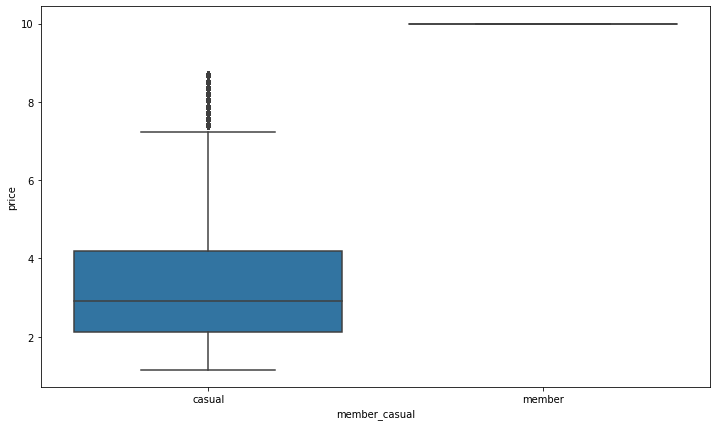

In [ ]:
#illustrate price distribution using boxplot
plt.figure(figsize = (12, 7))
sns.boxplot(data=df,x='member_casual',y='price')
plt.show()

# Analysis and Recommendations

**Analysis:**

*   There are more rides made by members than casual riders.(3131122, 2036164 respectively)
*   Members choose more electric bikes than classic bikes. Casual riders doesn't seem to prefer one bike type over another.
*   Busiest stations for casual riders are concentrated into the following:

    Start Station
    1. Streeter Dr & Grand Ave
    2. DuSable Lake SHore Dr & Monroe St
    3. DuSable Lake Shore Dr & North Blvd
    4. Michigan Ave & Oak St
    5. Wells St & Concord Ln
    6. Millenium Park

    End
    1.  Streeter Dr & Grand Ave
    2.   DuSable Lake Shore Dr & North Blvd
    3.   Michigan Ave & Oak St
    4.  DuSable Lake SHore Dr & Monroe St
    5.   Millenium Park
    6.  Wells St & Concord Ln
    7.   Theater on the Lake

  With Streeter Dr & Grand Ave having much greater count of casual rides than the others.

*   On the other hand, stations for members vary greatly. The only commonality betweeen casual and member rides station is Wells St & Concord Ln.
*  There are almost twice the rides by members on weekdays than casual riders. While on weekends the count of rides are almost the same for both.
*  There are high volume of member riders on 6-7 am and 5-6pm on Weekdays. Casual riders on 5-6pm Weekdays and 11am-4pm on Weekends. 
*   Busiest season is Summer (June, July, August), and lowest season is Winter.
*   Casual rides are longer (12 minutes) than member rides (8 minutes) but the cost per ride is much lower (2.92 dollars) than the monthly subsciption (10 dollars).



**Recommendations:**

*   Place promotions strategically on stations used most by casual riders, especially on Streeter Dr & Grand Ave (have most rides) and Wells St & Concord Ln (may have the riders that have higher chance to be converted since other members use this station often). Also these stations are located in crowded area where museum, parks, pier/beach, restaurants and shopping centers are present.

*   There is a median of 2.92 dollars per ride done by casual riders. Given this, we can say that for the price of less than 4 rides, casual riders can ride the bikes longer and more in a month if they became members, plus with other benefits too. Making the promotion in terms of number of rides makes it easier to understand and compare than using dollar/ mins, where people still need to compute it. 

*  Make use of peak times where ride lengths are longest for casual rides: 11 am- 5pm, Weekends, May and September. Longer ride lengths may mean they are enjoying the service. Offer a discounted membership subscription or trial plan around these times.


**For further study:**

*   Investigate the reason for negative length rides and missing station ids and names.
*   Explore further the outliers in the length rides.
*   Study the casual members who rents the bike more than 56 mins per ride and also those who accumulate more than 10$ of use per month. 


